## Part A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

### A2

In [56]:
df = pd.read_fwf('noisy_sculpt_faces.txt', header = None)

In [57]:
x = df.iloc[:, 0:16*16]

x

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.056093,0.415938,0.719415,0.932162,2.391543,0.682187,1.115505,1.398189,0.215669,0.083686,...,0.182481,2.361001,0.689666,0.281592,0.126626,0.755371,0.327616,0.744388,1.223287,2.116534
1,0.762678,0.930742,1.271641,0.702320,2.584826,0.970357,0.063090,0.381624,0.123773,0.318449,...,0.468735,1.088590,0.826769,1.667771,0.442511,0.164767,0.961547,0.680045,0.998800,2.239865
2,0.588691,1.400145,0.291282,1.177033,1.977980,0.308449,0.444745,1.975562,0.062846,0.096399,...,0.643063,0.968094,0.997666,0.361884,0.578730,1.501268,1.033376,0.423988,1.620479,1.247276
3,0.082060,0.282255,0.857199,1.918429,1.857358,0.795932,0.578579,1.734643,0.023514,0.133260,...,0.543352,2.577060,2.050068,1.093080,0.169771,1.596818,0.700006,0.681062,1.826064,0.447968
4,0.542892,1.373442,0.335660,1.482546,1.497209,0.924872,0.135507,2.547991,0.260916,0.128934,...,0.862522,0.600929,1.624902,2.782587,0.294598,0.822404,0.059020,0.060417,1.818864,0.415149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.182002,1.083738,1.060794,1.082431,1.966942,1.890146,0.057102,2.172668,0.121627,0.227911,...,0.806554,1.998780,0.692263,1.950992,0.129230,0.620470,1.379745,0.528725,1.939487,0.659426
96,0.988926,0.341485,0.905575,2.454822,1.004303,2.194332,0.318768,1.244579,0.239235,0.375250,...,0.540962,2.067947,0.306580,1.264911,0.017258,0.730341,1.192232,0.440904,1.056995,0.342748
97,0.301732,1.349374,0.090379,0.463554,2.141098,0.366942,0.635525,1.585404,0.132452,0.290975,...,0.619043,1.910553,0.290973,2.018704,0.233823,0.344291,1.794597,0.244755,0.486753,0.101027
98,0.499750,0.879379,0.381030,1.854218,1.343773,1.434418,0.861133,2.091459,0.016685,0.081711,...,0.790737,2.143063,1.498114,2.967316,0.591605,1.216581,0.770868,0.044732,0.479376,2.168679


In [58]:
y = df.iloc[:, 16*16:]
y.columns = ['pose_angle_lr', 'pose_angle_td', 'angle_light']
y = y['pose_angle_lr'] + y['pose_angle_td'] + y['angle_light']

y

0     281.967093
1     162.058689
2     201.076235
3     172.296481
4     261.859928
         ...    
95    119.734155
96    118.522095
97    205.634671
98    195.049744
99    154.248045
Length: 100, dtype: float64

In [60]:
loo = LeaveOneOut()
loo.get_n_splits(x)
se = []

for train_index, test_index in loo.split(x):
    x_train, x_test = x.iloc[train_index, i_var], x.iloc[test_index, i_var]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    x_train = np.array(x_train).reshape((-1, 1))
    x_test = np.array(x_test).reshape((-1, 1))
    knn_model = KNeighborsRegressor(n_neighbors = 1)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    se.append(float(y_pred - y_test)**2)
    
mse = np.mean(se)
mse

6053.832698324777

In [22]:
xy = pd.concat([x, y], axis = 1)

xy.corr().iloc[:, -1].sort_values(ascending = False)

0      1.000000
197    0.559740
180    0.507404
200    0.471464
184    0.469703
         ...   
84    -0.335629
49    -0.342187
96    -0.395450
81    -0.439063
53    -0.496222
Name: 0, Length: 257, dtype: float64

In [46]:
loo = LeaveOneOut()
loo.get_n_splits(x)
mse = []

for i_var in range(256):
    se = []
    for train_index, test_index in loo.split(x):
        x_train, x_test = x.iloc[train_index, i_var], x.iloc[test_index, i_var]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        x_train = np.array(x_train).reshape((-1, 1))
        x_test = np.array(x_test).reshape((-1, 1))
        knn_model = KNeighborsRegressor(n_neighbors = 1)
        knn_model.fit(x_train, y_train)
        y_pred = knn_model.predict(x_test)
        se.append(float(y_pred - y_test)**2)
    mse.append(np.mean(se))

In [54]:
mse_ = pd.DataFrame({'mse': mse})
mse_.sort_values('mse')

,mse
189,2961.538448
24,3152.621328
197,3305.012515
18,3482.252637
32,3766.725560
...,...
155,8177.412124
79,8228.941145
10,8377.436382
156,8654.608580


## Part C

### C3

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
sales = [11_000]
for day in range(1, 365):
    sales.append(sales[day-1] - random.normalvariate(2.5, 15))

costs = [10_000]
for day in range(1, 365):
    costs.append(costs[day-1] + random.normalvariate(2, 15))

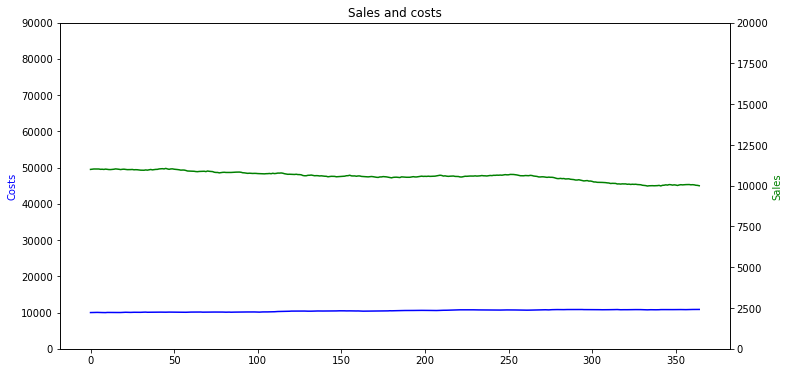

In [3]:
fig, ax1 = plt.subplots(figsize = (12, 6))
plt.title("Sales and costs")
plt.plot(costs, color = "blue")
ax1.set_ylabel("Costs", color = "blue")
plt.ylim([0, 90_000])
ax2 = ax1.twinx()
plt.plot(sales, color = "green")
ax2.set_ylabel("Sales", color = "green")
plt.ylim([0, 20_000])
plt.savefig('c3_junk.png');

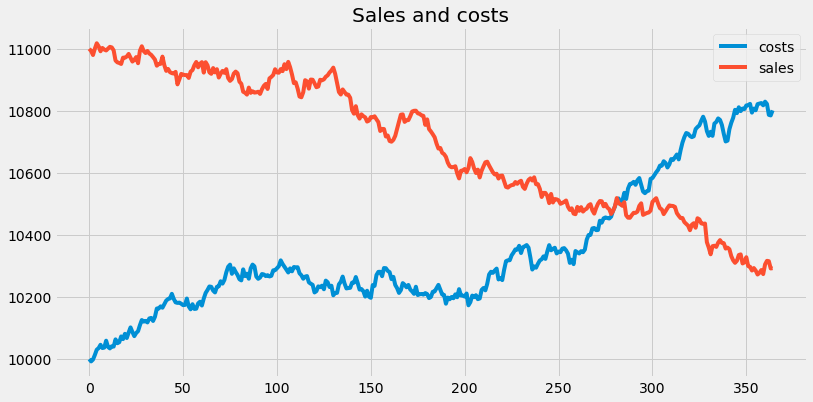

In [18]:
plt.style.use('fivethirtyeight')


fig = plt.subplots(figsize = (12, 6))
plt.title("Sales and costs")
plt.plot(costs)
#plt.ylim([9_800, 11_200])
plt.plot(sales)

plt.grid('white')
plt.legend(['costs', 'sales'])
plt.savefig('c3_sales.png')

  ## Part E

### E2

In [2]:
df = pd.read_fwf('swissroll.dat', header = None)
df.columns = ['x', 'y', 'z']

df

,x,y,z
0,0.573378,0.599408,0.713576
1,0.769206,0.828719,0.487060
2,0.263783,0.378243,0.388692
3,0.543420,0.563086,0.815491
4,0.262562,0.950000,0.565968
...,...,...,...
995,0.707996,0.861326,0.232411
996,0.927652,0.348017,0.470258
997,0.500875,0.242453,0.863005
998,0.907845,0.670004,0.856035


In [3]:
df['x_i'] = pd.cut(df['x'], np.linspace(0, 1, 6), labels = [0, 1, 2, 3, 4])
df['y_i'] = pd.cut(df['y'], np.linspace(0, 1, 6), labels = [0, 1, 2, 3, 4])
df['z_i'] = pd.cut(df['z'], np.linspace(0, 1, 6), labels = [0, 1, 2, 3, 4])

df

,x,y,z,x_i,y_i,z_i
0,0.573378,0.599408,0.713576,2,2,3
1,0.769206,0.828719,0.487060,3,4,2
2,0.263783,0.378243,0.388692,1,1,1
3,0.543420,0.563086,0.815491,2,2,4
4,0.262562,0.950000,0.565968,1,4,2
...,...,...,...,...,...,...
995,0.707996,0.861326,0.232411,3,4,1
996,0.927652,0.348017,0.470258,4,1,2
997,0.500875,0.242453,0.863005,2,1,4
998,0.907845,0.670004,0.856035,4,3,4


In [4]:
from sklearn.decomposition import PCA

comps_needed = []

for i in range(5):
    for j in range (5):
        for k in range(5):
            data = df.loc[((df['x_i'] == i) & (df['y_i'] == j) & (df['z_i'] == k)), ['x', 'y', 'z']]
            pca_model = PCA()
            if len(data) >= 5:
                pca_model.fit_transform(data)
                comps_needed.append(sum(np.cumsum(pca_model.explained_variance_ratio_) < 0.9) + 1)
            else:
                pass

In [191]:
np.mean(comps_needed)

1.934782608695652

In [7]:
len(comps_needed) / (5*5*5)

0.736

### E5

In [192]:
df = pd.read_fwf('swissroll.dat', header = None)
df.columns = ['x', 'y', 'z']

df

,x,y,z
0,0.573378,0.599408,0.713576
1,0.769206,0.828719,0.487060
2,0.263783,0.378243,0.388692
3,0.543420,0.563086,0.815491
4,0.262562,0.950000,0.565968
...,...,...,...
995,0.707996,0.861326,0.232411
996,0.927652,0.348017,0.470258
997,0.500875,0.242453,0.863005
998,0.907845,0.670004,0.856035


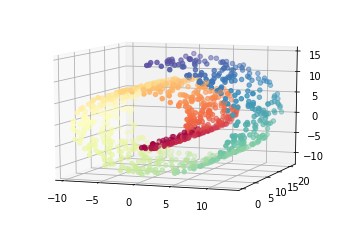

In [209]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll


X, color = make_swiss_roll(1000)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -70)
plt.show()


In [210]:
from sklearn.manifold import MDS

mds_model = MDS(n_components=2, dissimilarity='euclidean')

X = mds_model.fit_transform(X)

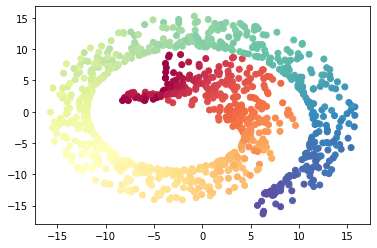

In [211]:
plt.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral);

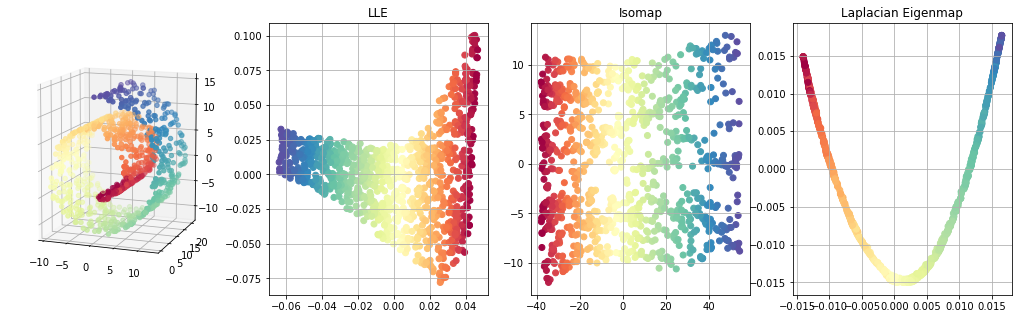

In [30]:
from collections import OrderedDict
from functools import partial
from time import time
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

n_points = 1000
X, color = make_swiss_roll(1000)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -70)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['Laplacian Eigenmap'] = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)

for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    ax = fig.add_subplot(1, 4, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title(f'{label}')
    plt.grid()
    ax.axis('tight')
plt.savefig('e7_figs.png')
plt.show()

## Part F

### F1

In [70]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data[:, :4]
y = iris.target

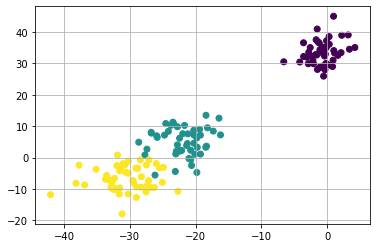

In [39]:
nca_model = NeighborhoodComponentsAnalysis()
nca_model.fit(x, y)

z = nca_model.fit_transform(x, y)

plt.scatter(z[:, 0], z[:, 1], c = y)
plt.grid();

In [56]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X)
pred_true = []

for train_index, test_index in loo.split(x):
    z_train, z_test = z[train_index], z[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn_model = KNeighborsClassifier(n_neighbors = 1)
    knn_model.fit(z_train, y_train)
    pred_true.append(knn_model.predict(z_test) == y_test)
    
np.mean(pred_true)

0.9866666666666667

In [69]:
loo = LeaveOneOut()
loo.get_n_splits(X)
pred_true = []

for train_index, test_index in loo.split(x):
    z_train, z_test = z[train_index], z[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn_model = KNeighborsClassifier(n_neighbors = 1, algorithm = 'brute', metric = 'mahalanobis', metric_params = {'V': np.cov(z)})
    knn_model.fit(z_train, y_train)
    pred_true.append(knn_model.predict(z_test) == y_test)
    
np.mean(pred_true)

0.9066666666666666

## Part G

### G1

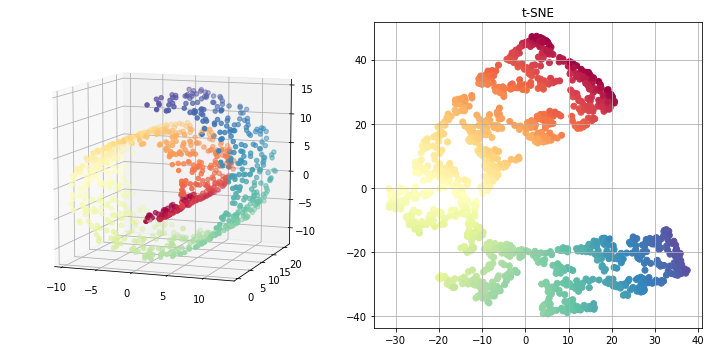

In [104]:
from sklearn.manifold import TSNE

n_points = 1000
X, color = make_swiss_roll(n_points)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize = (10, 5))

# Add 3d scatter plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -70)


methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    ax = fig.add_subplot(1, 2, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title(f'{label}')
    plt.grid()
plt.tight_layout()
plt.savefig('g1_roll.png')
plt.show()

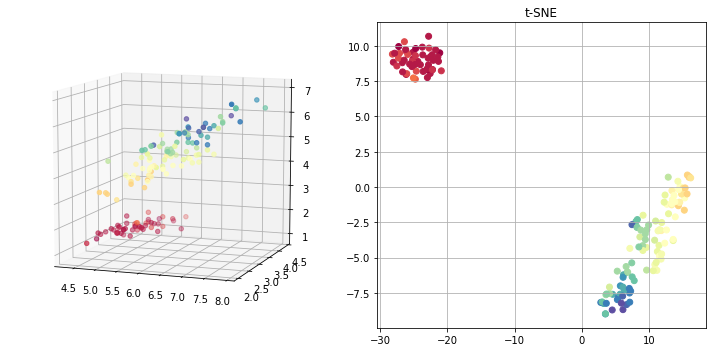

In [103]:
n_neighbors = 10
n_components = 2
iris = datasets.load_iris()

X = iris.data[:, :4]
y = iris.target

# Create figure
fig = plt.figure(figsize = (10, 5))

# Add 3d scatter plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 3], cmap=plt.cm.Spectral)
ax.view_init(10, -70)


methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    ax = fig.add_subplot(1, 2, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=X[:, 3], cmap=plt.cm.Spectral)
    ax.set_title(f'{label}')
    plt.grid()
plt.tight_layout()
plt.savefig('g1_iris.png')
plt.show()

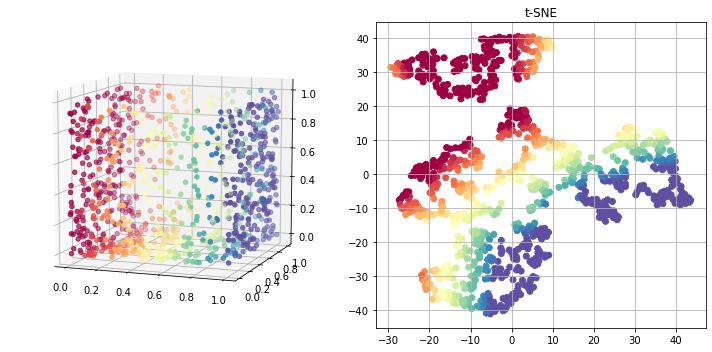

In [102]:
X = pd.read_fwf('openbox.dat', header = None)

n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize = (10, 5))

# Add 3d scatter plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=X.iloc[:, 0], cmap=plt.cm.Spectral)
ax.view_init(10, -70)


methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    ax = fig.add_subplot(1, 2, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=X.iloc[:, 0], cmap=plt.cm.Spectral)
    ax.set_title(f'{label}')
    plt.grid()
plt.tight_layout()
plt.savefig('g1_box.png')
plt.show()